In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#windows
citycrime= pd.read_csv('C:\\Pri doc\\priti\\Projects\\Myproject\\Berkely\\My class projects data\\california-crime-and-law-enforcement\\ca_offenses_by_city.csv')


In [ ]:
citycrime.dropna(axis=1, how='all')

In [ ]:
citycrime.head()

In [ ]:
citycrime['Crime_rate']= round((citycrime['TotalCrime']/citycrime['Population'])*100000,0)
#citycrime['Crime_rate']= (citycrime['TotalCrime']/citycrime['Population'])

In [ ]:
citycrime.head()

In [ ]:
import chardet
with open('C:\\Pri doc\\priti\\Projects\\Myproject\\Berkely\\My class projects data\\california-crime-and-law-enforcement\\PritiCitiPopulation.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

citypopulation=pd.read_csv('C:\\Pri doc\\priti\\Projects\\Myproject\\Berkely\\My class projects data\\california-crime-and-law-enforcement\\PritiCitiPopulation.csv', encoding=result['encoding'])

In [ ]:
citypopulation.head()

In [ ]:
citypopulation.dropna(axis=0, how='all')

In [ ]:
citypopulation['Population']=citypopulation['Population'].fillna(0).astype(int)

In [ ]:
citypopulation.head()

In [ ]:
countypopulation = citypopulation.groupby(['County']).agg({'Population':['sum']})
countypopulation .columns = countypopulation .columns.droplevel(1)
countypopulation .columns

In [ ]:
countypopulation=countypopulation.reset_index()

In [ ]:
countypopulation.head()

In [ ]:
#merge city and county population data
city_crime_merged_data = pd.merge(citycrime,citypopulation,on='City')

In [ ]:
city_crime_merged_data.head()

In [ ]:
#del city_crime_merged_data['Population_y']

city_crime_merged_data = city_crime_merged_data.drop('Population_y', axis=1)

In [ ]:
city_crime_merged_data.head()

In [ ]:
city_crime_merged_data.rename(columns={'Population_x': 'Population'}, inplace=True)

In [ ]:
city_crime_merged_data.head()

In [ ]:
d.head()

In [ ]:
c=city_crime_merged_data[city_crime_merged_data.County == 'Alameda']
#city_crime_merged_data.loc[city_crime_merged_data['State']=='CA'].groupby(['County'])['RegionName'].count()

In [ ]:
c.head()

In [ ]:
countycrime= pd.read_csv('C:\\Pri doc\\priti\\Projects\\Myproject\\Berkely\\My class projects data\\california-crime-and-law-enforcement\\ca_offenses_by_county.csv')


In [ ]:
countycrime.head()

In [ ]:
county_crime_merged_data = pd.merge(countycrime,countypopulation,on='County')

In [ ]:
county_crime_merged_data.dtypes

In [ ]:
county_crime_merged_data.rename(columns={"Total Crime " : "TotalCrime"},inplace = True)

In [ ]:
county_crime_merged_data['TotalCrime'] = county_crime_merged_data['TotalCrime'].astype(np.int32)

In [ ]:
county_crime_merged_data.dtypes

In [ ]:
county_crime_merged_data.columns

In [ ]:
county_crime_merged_data['Crime_rate']= round((county_crime_merged_data['TotalCrime']/county_crime_merged_data['Population'])*100000,2)

In [ ]:
county_crime_merged_data['Crime_rate']= (county_crime_merged_data['TotalCrime']/county_crime_merged_data['Population'])*100000

In [ ]:
county_crime_merged_data.head()

In [ ]:
county_crime_merged_data.Crime_rate = round(county_crime_merged_data.Crime_rate,2)

In [ ]:
county_crime_merged_data.head()

In [ ]:
#county_crime_merged_data.loc[(county_crime_merged_data!=0).any(axis=1)]
county_crime_merged_data = county_crime_merged_data[county_crime_merged_data.Population!= 0]

In [ ]:
county_crime_merged_data

In [ ]:
county_crime_merged_data['Crime_rate']

In [ ]:
ax = county_crime_merged_data[['County', 'Crime_rate']].plot(x='County', linestyle='-', marker='o')
plt.show()

In [2]:
school= pd.read_csv('C:\\Pri doc\\priti\\Projects\\Myproject\\Berkely\\Week 3 Python\\school_data.csv')

In [3]:
school.head()

,School Name,County Name,District Name,Zip Code,Grade,Test Name,2015-2017 Avg Percentage Standard Met and Above,School Type
0,21St Century Learning Institute,Riverside,Beaumont Unified,90804,8,English Language Arts/Literacy,45.00,Middle School
1,21St Century Learning Institute,Riverside,Beaumont Unified,90804,8,Mathematics,18.00,Middle School
2,21St Century Learning Institute,Riverside,Beaumont Unified,90804,11,English Language Arts/Literacy,34.29,High School
3,21St Century Learning Institute,Riverside,Beaumont Unified,90804,11,Mathematics,4.38,High School
4,21St Century Learning Institute,Riverside,Beaumont Unified,90804,13,English Language Arts/Literacy,33.44,High School


In [4]:
school.rename(columns={'School Name': 'School_Name',"County Name": "County"}, inplace=True)

In [5]:
school_agg = school.groupby(['County','District Name','School Type']).agg({'2015-2017 Avg Percentage Standard Met and Above':['mean']})


In [6]:
school_county = school.groupby(['County','School Type']).agg({'2015-2017 Avg Percentage Standard Met and Above':['mean']})


In [7]:
school_county .columns = school_county .columns.droplevel(1)
school_county .columns

school_county=school_county.reset_index()

In [8]:
school_county .columns

Index(['County', 'School Type',
       '2015-2017 Avg Percentage Standard Met and Above'],
      dtype='object')

In [9]:
school_county.rename(columns={'2015-2017 Avg Percentage Standard Met and Above': 'Avg_Percentage_Standard_Met'}, inplace=True)

In [10]:
school_county['Avg_Percentage_Standard_Met']= round(school_county['Avg_Percentage_Standard_Met'],0)

In [11]:
school_county.head()

,County,School Type,Avg_Percentage_Standard_Met
0,Alameda,Elementary School,43.0
1,Alameda,High School,41.0
2,Alameda,Middle School,41.0
3,Alpine,Elementary School,35.0
4,Alpine,High School,52.0


In [12]:
d = {"Elementary School":1, "Middle School":2,"High School":3}
school_county['type_id'] = school_county['School Type'].map(d)


In [13]:
school_county.dtypes

County                          object
School Type                     object
Avg_Percentage_Standard_Met    float64
type_id                        float64
dtype: object

In [14]:
school_county['type_id']=school_county['type_id'].fillna(0).astype(int)

In [15]:
school_county.dtypes

County                          object
School Type                     object
Avg_Percentage_Standard_Met    float64
type_id                          int32
dtype: object

In [16]:
school_county['County']=school_county['County'].fillna(0).astype(str)

In [17]:
school_county.head()

,County,School Type,Avg_Percentage_Standard_Met,type_id
0,Alameda,Elementary School,43.0,1
1,Alameda,High School,41.0,3
2,Alameda,Middle School,41.0,2
3,Alpine,Elementary School,35.0,1
4,Alpine,High School,52.0,3


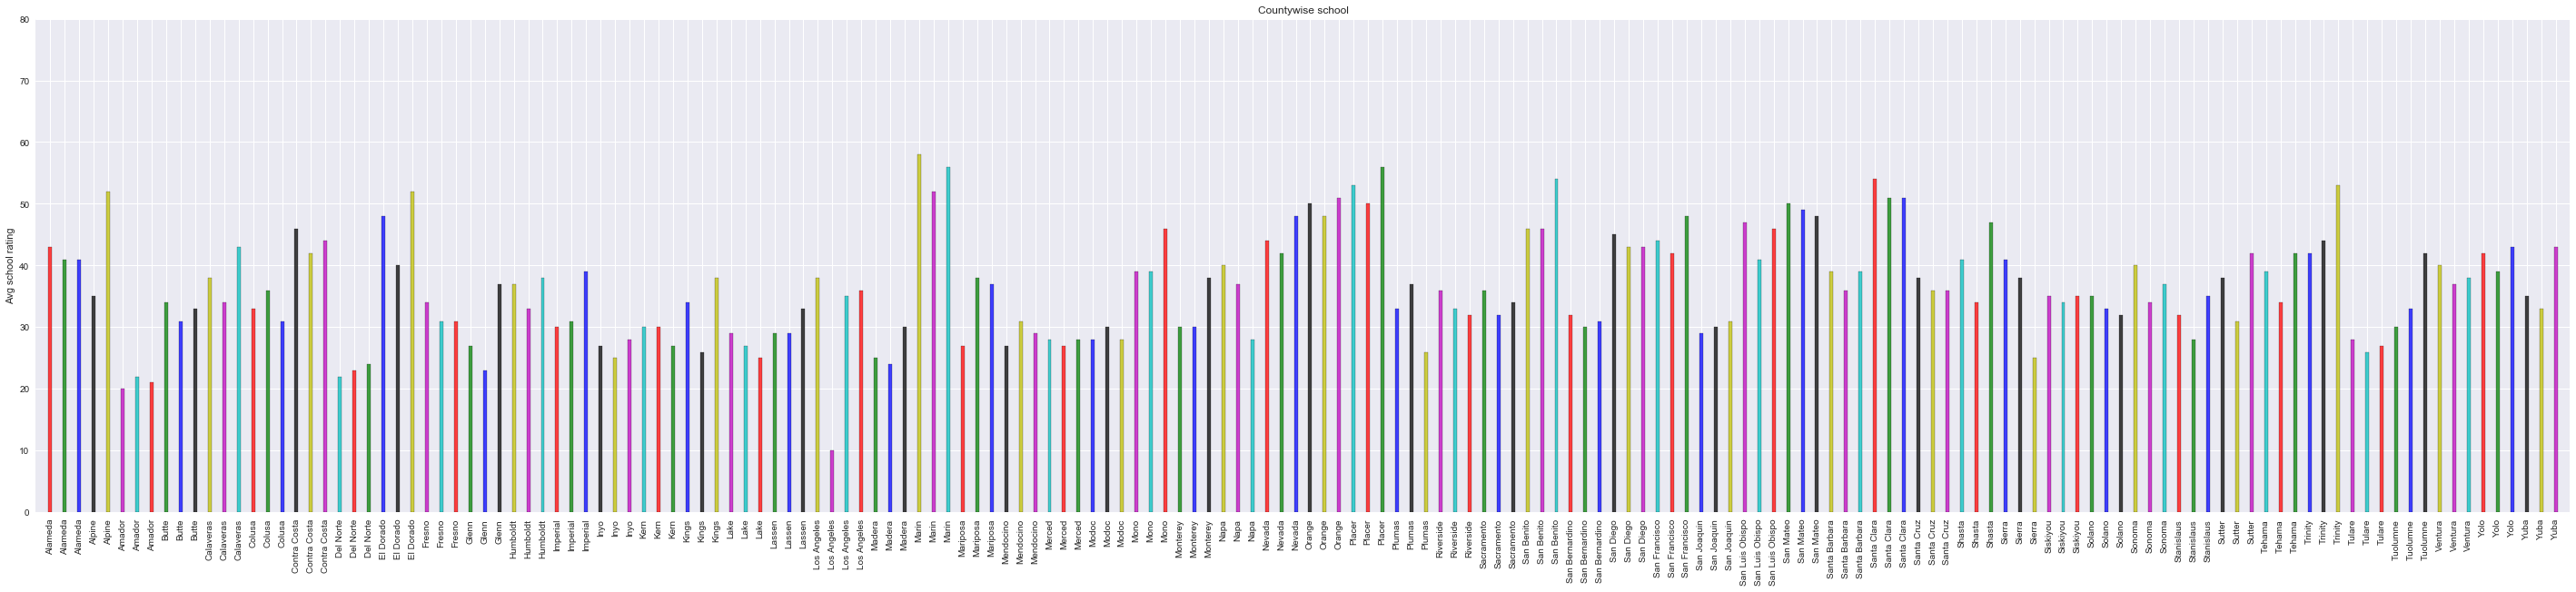

In [21]:
# Set x values
x_values = np.arange(len(school_county))
# Set figure size to adjust for space
plt.figure(figsize=(50,10))
#Plot the data:
my_colors = 'rgbkymc'
# Create a bar chart
plt.bar(x_values,school_county["Avg_Percentage_Standard_Met"], color=my_colors, alpha=0.75, width=0.25, edgecolor='black')
# Create ticks
plt.xticks(x_values,school_county["County"], rotation="vertical")

# Set x and y limits
plt.xlim(-1,len(x_values))
plt.ylim(0,80)

#plt.plot()

#county_crime_merged_data.plot(x='County', y='Crime_rate')

#ax = county_crime_merged_data[['County', 'Crime_rate']].plot(x='County', linestyle='-', marker='o')
#school_county[['County', 'Avg_Percentage_Standard_Met']].plot(x='County', kind='bar', ax=ax)

#school_county[['County', 'Avg_Percentage_Standard_Met']].plot(x='County', kind='bar')

plt.title("Countywise school")
plt.ylabel("Avg school rating")
#plt.tight_layout()


plt.show()




